# Principal Component Analysis with Cancer Data

In [1]:
#Import all the necessary modules
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [2]:
df_orig = pd.read_csv("breast-cancer-wisconsin-data.csv")
df_orig.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [3]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

In [4]:
df=df_orig
df.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [5]:
#drop ID column
#df=df.drop(columns='ID')
df.columns

Index(['ID', 'ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [6]:
# data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [7]:
# shape of df
df.shape

(699, 11)

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [8]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column


####  Since all columns are int and only 'Bare Nuclei' column is object and this column has question mark

In [9]:
#check for missing values
df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [10]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?


In [11]:
df.isin(['?']).sum()

ID                              0
ClumpThickness                  0
Cell Size                       0
Cell Shape                      0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Normal Nucleoli                 0
Bland Chromatin                 0
Mitoses                         0
Class                           0
dtype: int64

In [12]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values


In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [14]:
df['Bare Nuclei'].value_counts()

1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

## replacing the ? with mode value which is '1' as '1' has occured  highest no. of times(402 times) in the 'Bare Nuclei' column

In [15]:
# replacing  '?'  with '1'
df = df.replace(to_replace ="?", value ="1")
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [16]:
df.isin(['?']).sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.2+ KB


In [18]:
df = df.astype({'Bare Nuclei' : int})

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null int64
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(11)
memory usage: 60.2 KB


In [20]:
# shape before droping
df.shape

(699, 11)

In [21]:
#Droping duplicates
#df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    690
True       9
dtype: int64

In [22]:
df.drop_duplicates(inplace=True)

In [23]:
#shape after droping
df.shape

(690, 11)

# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


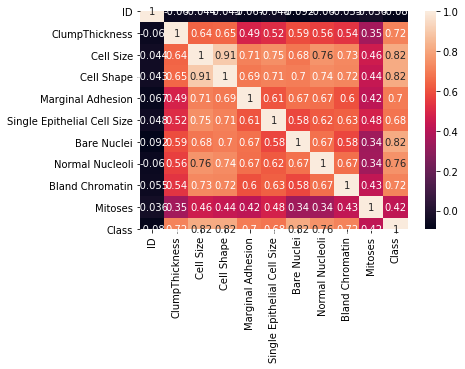

In [24]:
sns.heatmap(df.corr(),annot=True)

In [25]:
# Check for correlation of variable
df.corr()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
ID,1.000000,-0.059592,-0.043856,-0.042803,-0.066771,-0.048102,-0.091832,-0.059802,-0.054517,-0.036286,-0.080084
ClumpThickness,-0.059592,1.000000,0.643173,0.653589,0.487715,0.517253,0.590648,0.561063,0.535507,0.350196,0.716812
Cell Size,-0.043856,0.643173,1.000000,0.905349,0.712933,0.746982,0.684571,0.759632,0.727073,0.459918,0.817586
Cell Shape,-0.042803,0.653589,0.905349,1.000000,0.690782,0.714243,0.704165,0.738576,0.724519,0.440435,0.817551
Marginal Adhesion,-0.066771,0.487715,0.712933,0.690782,1.000000,0.608281,0.672512,0.669860,0.602228,0.417008,0.701175
Single Epithelial Cell Size,-0.048102,0.517253,0.746982,0.714243,0.608281,1.000000,0.580487,0.620526,0.633880,0.482517,0.681063
Bare Nuclei,-0.091832,0.590648,0.684571,0.704165,0.672512,0.580487,1.000000,0.672754,0.578161,0.342823,0.816655
Normal Nucleoli,-0.059802,0.561063,0.759632,0.738576,0.669860,0.620526,0.672754,1.000000,0.669099,0.343769,0.756736
Bland Chromatin,-0.054517,0.535507,0.727073,0.724519,0.602228,0.633880,0.578161,0.669099,1.000000,0.427490,0.715363
Mitoses,-0.036286,0.350196,0.459918,0.440435,0.417008,0.482517,0.342823,0.343769,0.427490,1.000000,0.423947


In [26]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

In [27]:
#Let us check for pair plots

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


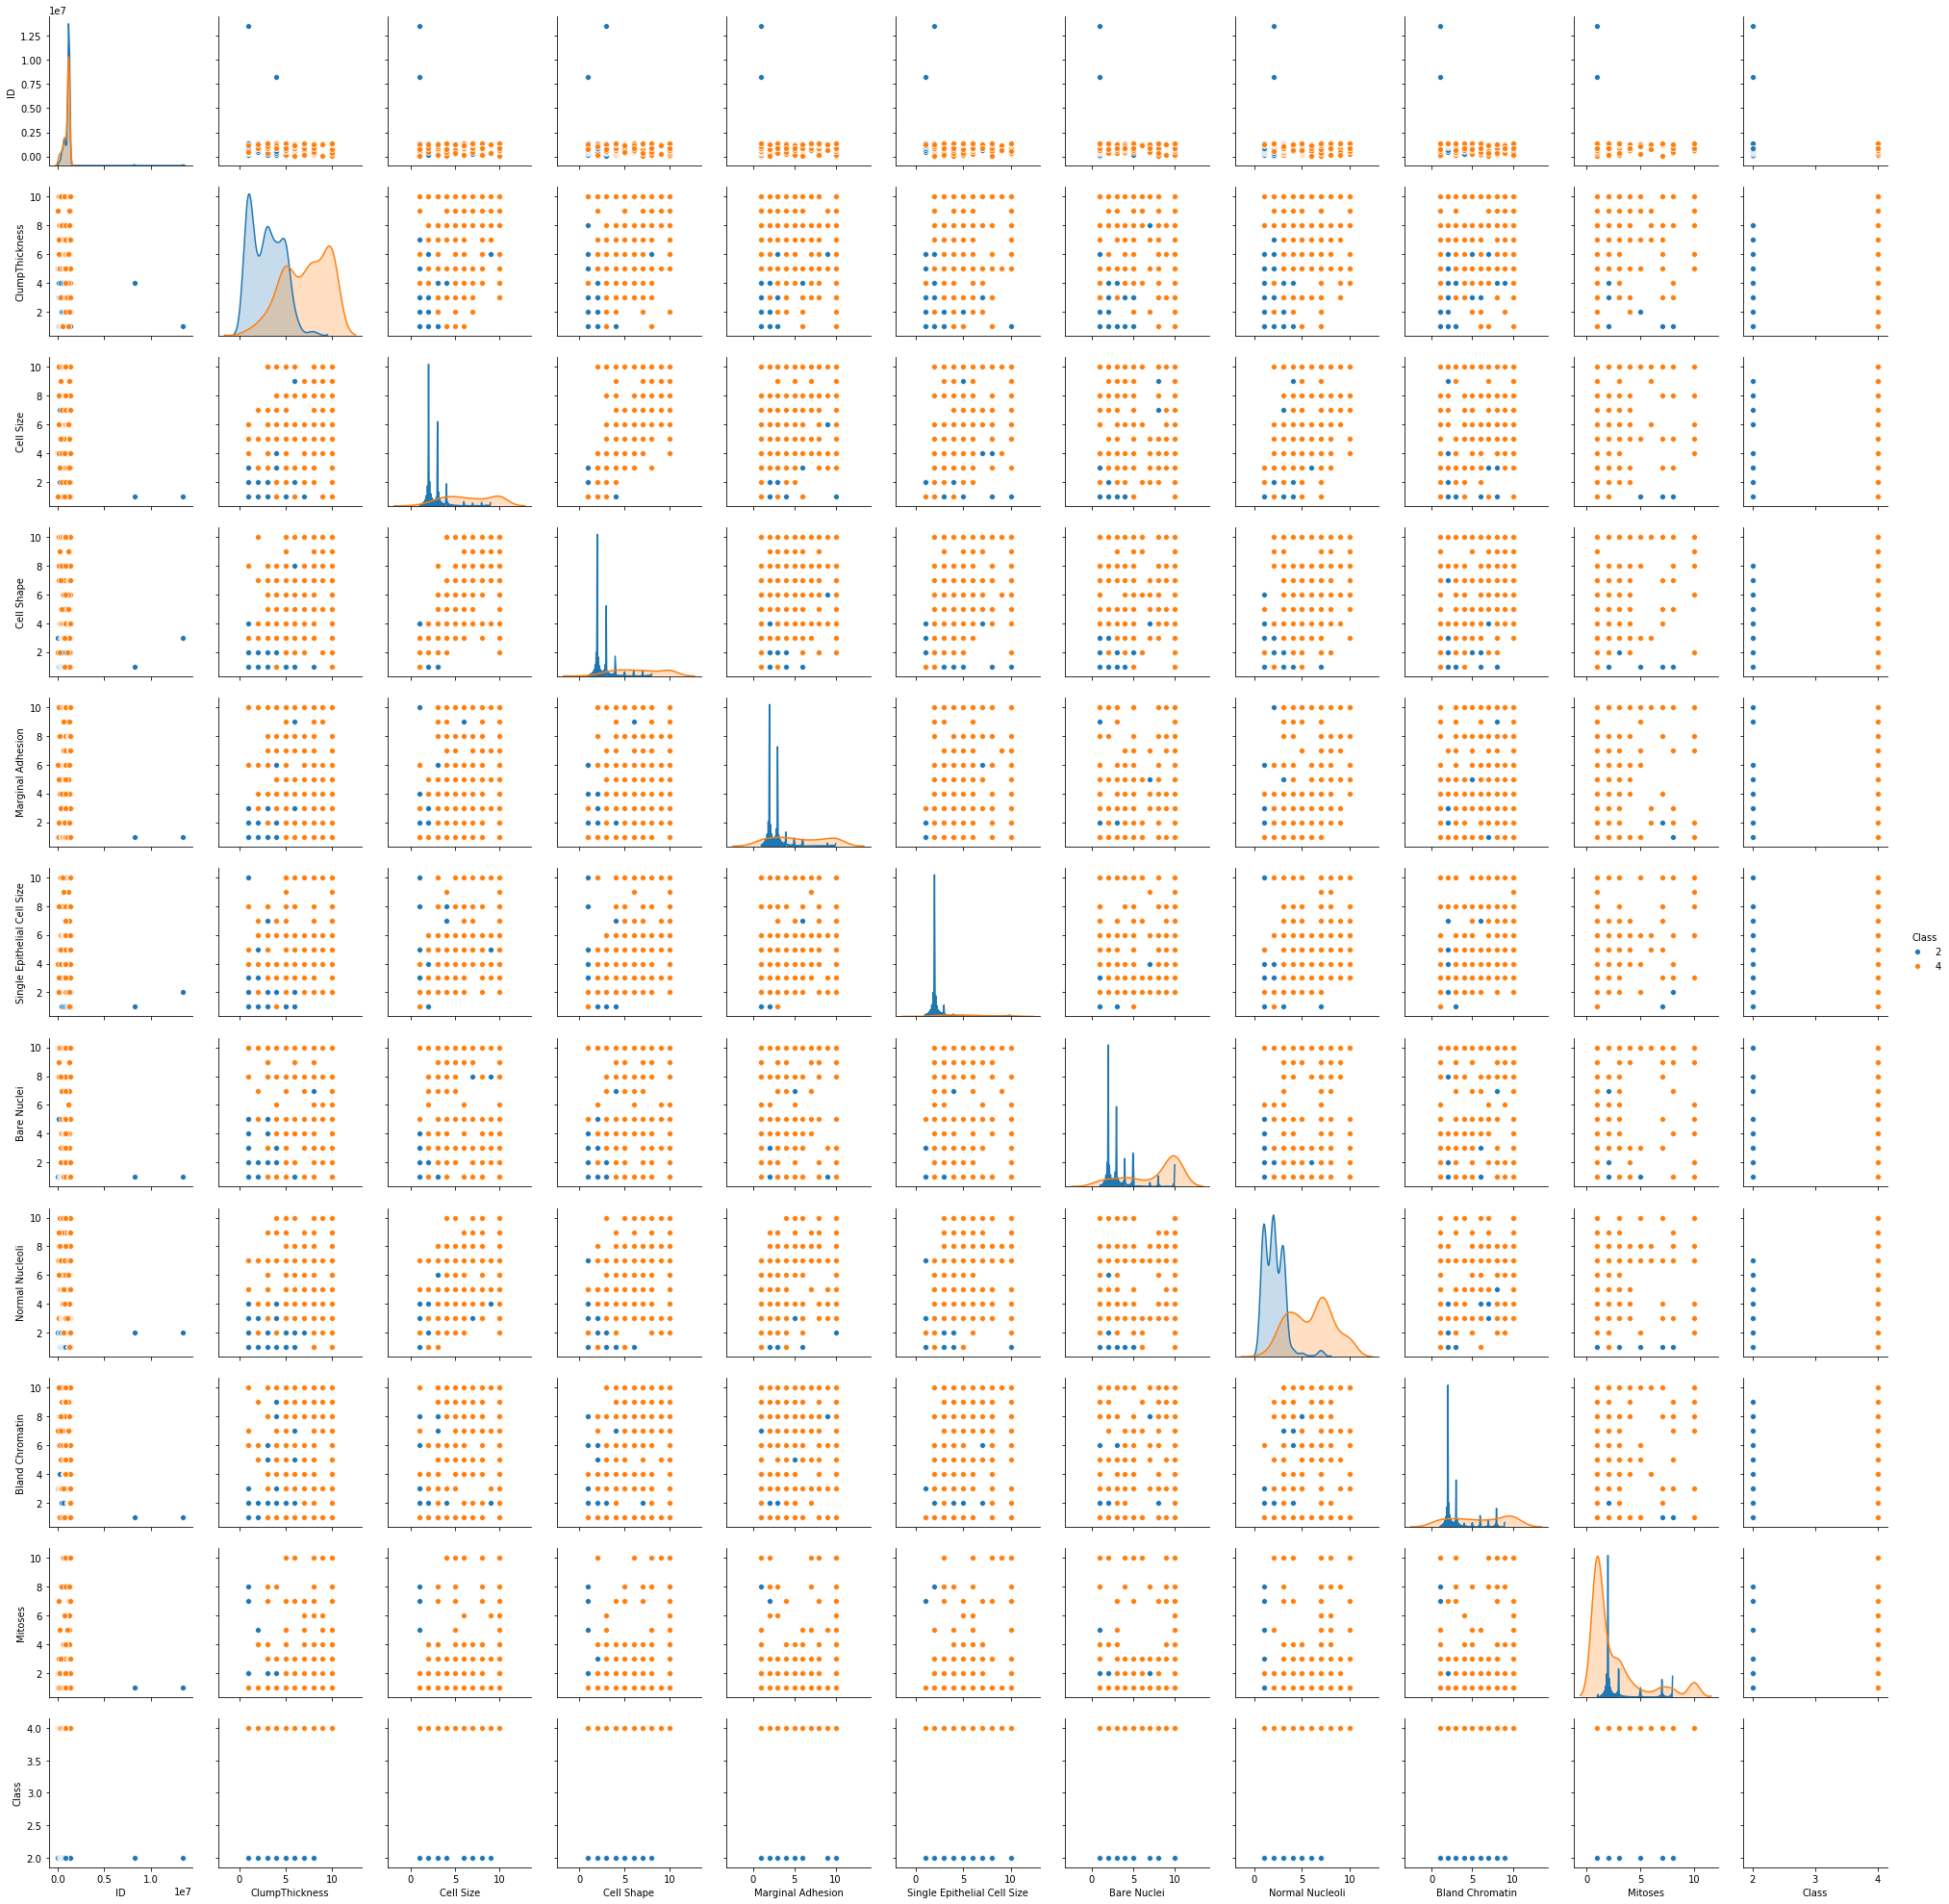

In [28]:
import seaborn as sns
sns.pairplot(df,diag_kind='kde',hue='Class')

In [29]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [30]:
# We could see most of the outliers are now removed.

In [31]:
#drop ID column
df=df.drop(columns='ID')

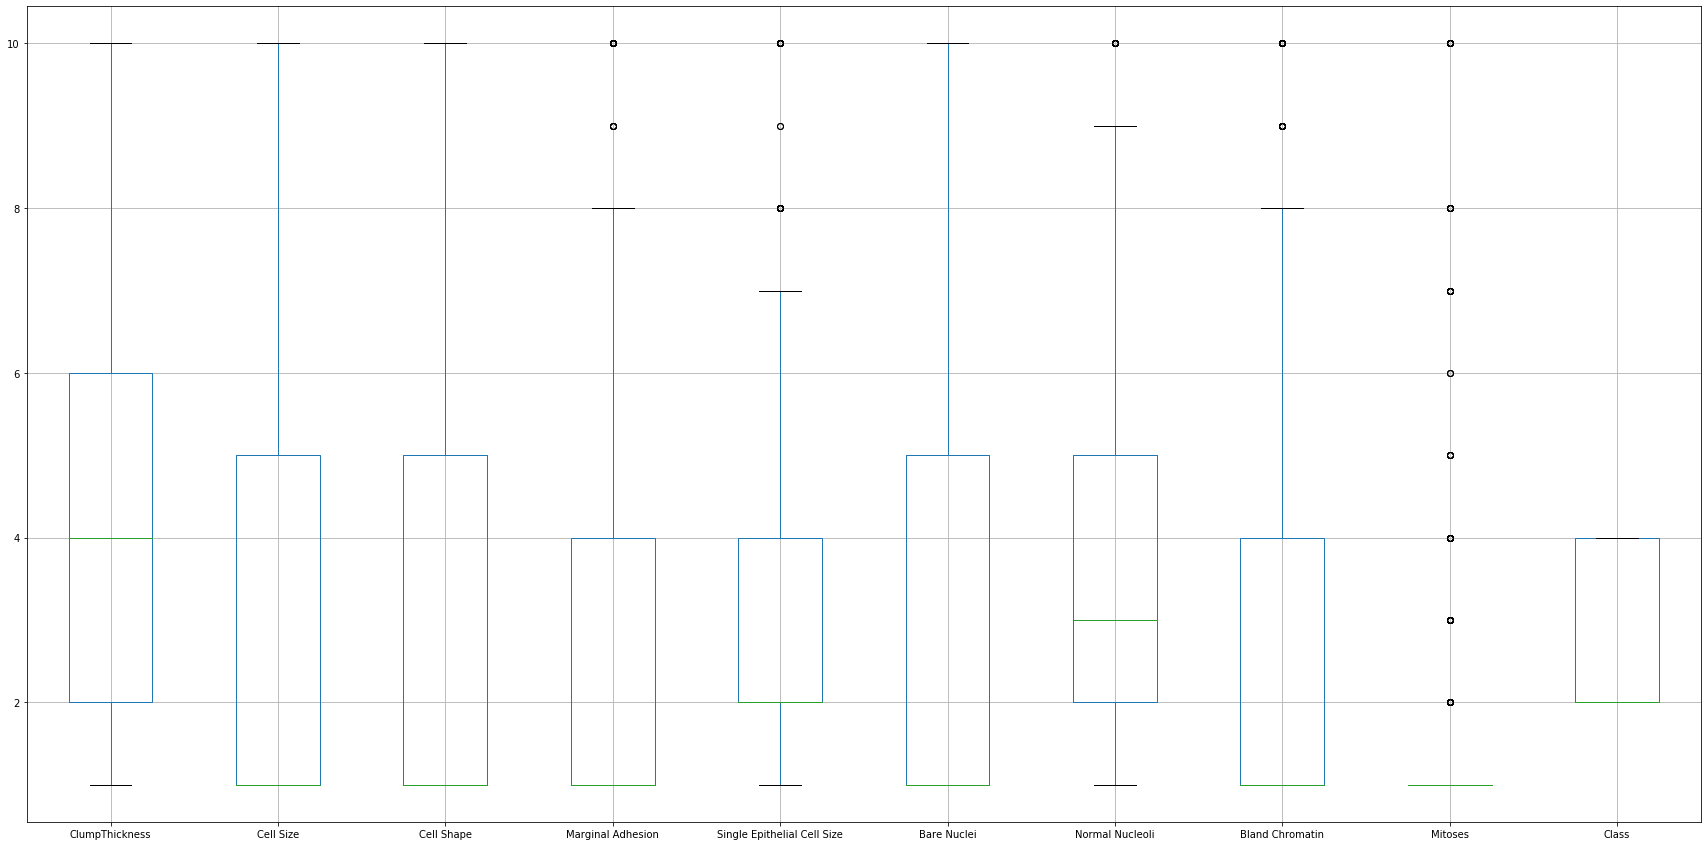

In [32]:
df.boxplot(figsize=(30,15))

In [33]:
#remove outliers for 'Marginal Adhesion'
df.loc[df['Marginal Adhesion'] > 8, 'Marginal Adhesion'] = df['Marginal Adhesion'].quantile(0.75)
print(df['Marginal Adhesion'][df['Marginal Adhesion'] > 8])

#remove outliers for 'Single Epithelial Cell Size'
df.loc[df['Single Epithelial Cell Size'] > 7, 'Single Epithelial Cell Size'] = df['Single Epithelial Cell Size'].quantile(0.75)
print(df['Single Epithelial Cell Size'][df['Single Epithelial Cell Size'] > 7])

#remove outliers for 'Normal Nucleoli'
df.loc[df['Normal Nucleoli'] > 9, 'Normal Nucleoli'] = df['Normal Nucleoli'].quantile(0.75)
print(df['Normal Nucleoli'][df['Normal Nucleoli'] > 9])

#remove outliers for 'Bland Chromatin'
df.loc[df['Bland Chromatin'] > 8, 'Bland Chromatin'] = df['Bland Chromatin'].quantile(0.75)
print(df['Bland Chromatin'][df['Bland Chromatin'] > 8])

#remove outliers for 'Mitoses'
df.loc[df['Mitoses'] > 1, 'Mitoses'] = df['Mitoses'].quantile(0.75)
print(df['Mitoses'][df['Mitoses'] > 1])

Series([], Name: Marginal Adhesion, dtype: float64)
Series([], Name: Single Epithelial Cell Size, dtype: float64)
Series([], Name: Normal Nucleoli, dtype: float64)
Series([], Name: Bland Chromatin, dtype: float64)
Series([], Name: Mitoses, dtype: float64)


In [34]:
df.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [35]:
df.shape

(690, 10)

In [36]:

df.drop(columns='Class',inplace=True)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.values)
df_scaled = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)


df_scaled_2 = df_scaled.copy(deep=True)


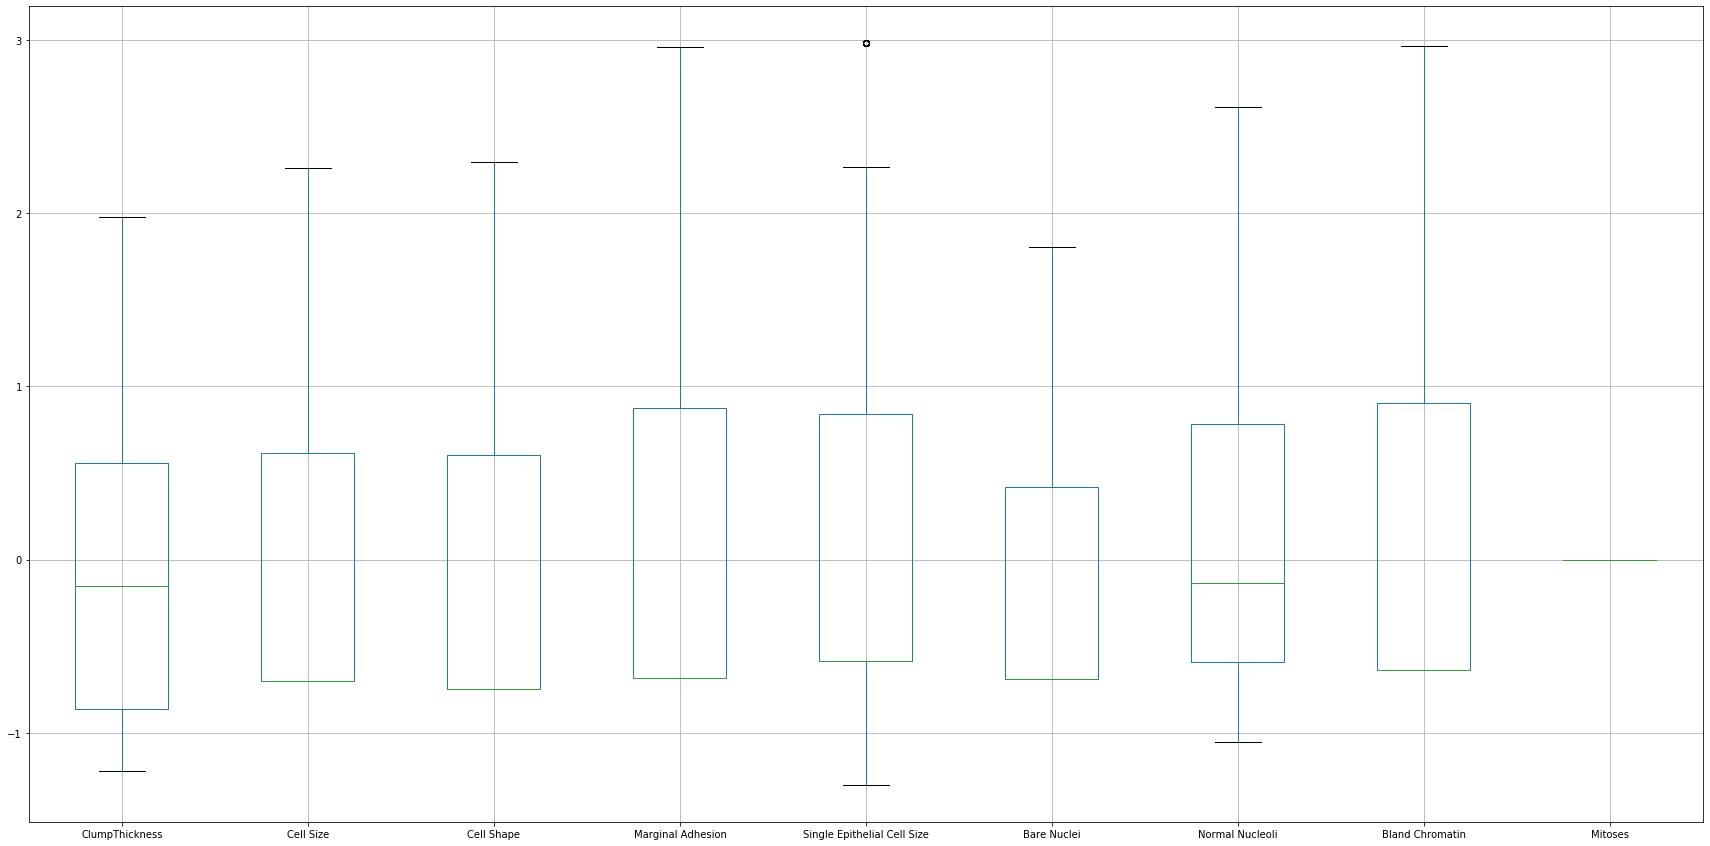

In [37]:
df_scaled.boxplot(figsize=(30,15))


# Q6 Create a covariance matrix for identifying Principal components

In [38]:
# PCA
# Step 1 - Create covariance matrix


In [39]:
cov_matrix = np.cov(df_scaled.T)

print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.49279485 0.53403385 0.59150555
  0.56551502 0.51578744 0.        ]
 [0.64410677 1.00145138 0.9066632  0.69312971 0.73745171 0.68556472
  0.72276807 0.65740596 0.        ]
 [0.65453792 0.9066632  1.00145138 0.66107626 0.71431099 0.70518656
  0.70397842 0.63949795 0.        ]
 [0.49279485 0.69312971 0.66107626 1.00145138 0.64404683 0.64939578
  0.66034173 0.58293653 0.        ]
 [0.53403385 0.73745171 0.71431099 0.64404683 1.00145138 0.62229193
  0.6285222  0.62013468 0.        ]
 [0.59150555 0.68556472 0.70518656 0.64939578 0.62229193 1.00145138
  0.6835083  0.58982763 0.        ]
 [0.56551502 0.72276807 0.70397842 0.66034173 0.6285222  0.6835083
  1.00145138 0.61888241 0.        ]
 [0.51578744 0.65740596 0.63949795 0.58293653 0.62013468 0.58982763
  0.61888241 1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [40]:
# Step 2- Get eigen values and eigen vector

In [41]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ 0.31604737 -0.00888914  0.82634557  0.05980487  0.13499436 -0.16552224
  -0.37847444 -0.15731316  0.        ]
 [ 0.38785154 -0.72526838  0.05245436  0.02474312 -0.37748723  0.27730818
   0.27169767 -0.16424745  0.        ]
 [ 0.38390378  0.67952999  0.12851783  0.00164897 -0.36316144  0.36489995
   0.32389918 -0.06624536  0.        ]
 [ 0.34312829  0.05563614 -0.4189233  -0.39913778  0.06302594  0.18287441
  -0.57609519 -0.41840042  0.        ]
 [ 0.35123057  0.03641762 -0.22325389  0.1906435  -0.50305919 -0.53545051
  -0.28155004  0.41240438  0.        ]
 [ 0.35237471 -0.07763428  0.03271821 -0.3809319   0.38727059  0.24254447
   0.04164535  0.71629932  0.        ]
 [ 0.35644858  0.0382504  -0.11097217 -0.23057295  0.32121124 -0.59526257
   0.51377447 -0.29073048  0.        ]
 [ 0.33163182  0.01529543 -0.24322906  0.77580895  0.44406948  0.17098227
  -0.03423686 -0.03378876  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.       

# Q8 Find variance and cumulative variance by each eigen vector

In [42]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)   # array of size =  as many PC dimensions
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 69.32428003  76.13546029  81.65833711  86.88443726  91.13052493
  95.16020915  98.86337652 100.         100.        ]


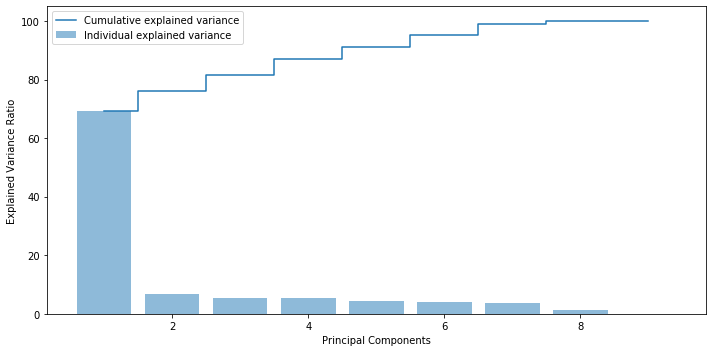

In [43]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [44]:
from sklearn.decomposition import PCA
pca = PCA()
# fit on data
pca.fit(df_scaled)
# access values and vectors
print("PCA components")
print(pca.components_)

print("\nExplained Variance")
print(pca.explained_variance_)
# transform data
df_pca = pca.transform(df_scaled)


PCA components
[[ 0.31604737  0.38785154  0.38390378  0.34312829  0.35123057  0.35237471
   0.35644858  0.33163182 -0.        ]
 [ 0.82634557  0.05245436  0.12851783 -0.4189233  -0.22325389  0.03271821
  -0.11097217 -0.24322906 -0.        ]
 [ 0.05980487  0.02474312  0.00164897 -0.39913778  0.1906435  -0.3809319
  -0.23057295  0.77580895  0.        ]
 [-0.13499436  0.37748723  0.36316144 -0.06302594  0.50305919 -0.38727059
  -0.32121124 -0.44406948  0.        ]
 [ 0.37847444 -0.27169767 -0.32389918  0.57609519  0.28155004 -0.04164535
  -0.51377447  0.03423686  0.        ]
 [-0.15731316 -0.16424745 -0.06624536 -0.41840042  0.41240438  0.71629932
  -0.29073048 -0.03378876  0.        ]
 [ 0.16552224 -0.27730818 -0.36489995 -0.18287441  0.53545051 -0.24254447
   0.59526257 -0.17098227 -0.        ]
 [ 0.00888914  0.72526838 -0.67952999 -0.05563614 -0.03641762  0.07763428
  -0.0382504  -0.01529543  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.          0

# Q10 Find correlation between components and features

In [45]:
df_comp=pd.DataFrame(pca.components_,columns=list(df_scaled))
df_comp.head()

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,0.316047,0.387852,0.383904,0.343128,0.351231,0.352375,0.356449,0.331632,-0.0
1,0.826346,0.052454,0.128518,-0.418923,-0.223254,0.032718,-0.110972,-0.243229,-0.0
2,0.059805,0.024743,0.001649,-0.399138,0.190643,-0.380932,-0.230573,0.775809,0.0
3,-0.134994,0.377487,0.363161,-0.063026,0.503059,-0.387271,-0.321211,-0.444069,0.0
4,0.378474,-0.271698,-0.323899,0.576095,0.281550,-0.041645,-0.513774,0.034237,0.0


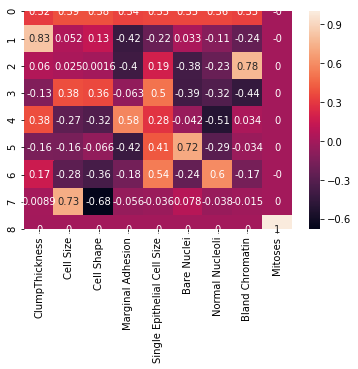

In [46]:
sns.heatmap(df_comp, annot=True)

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [47]:
df_jokes = pd.read_csv('jokes.csv')
df_jokes.head()

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [48]:
ratings = df_jokes.iloc[0:200,1:]
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,99.00,99.00,99.00,99.00,8.59,-9.85,7.72,8.79,99.00,99.00,...,99.00,99.00,99.00,99.00,99.00,2.33,99.00,99.00,99.00,99.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,99.00,4.47,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00


# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [49]:
ratings.isin(['99']).sum()
ratings = ratings.replace(to_replace =99, value =0)
ratings

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
5,-6.17,-3.54,0.44,-8.50,-7.09,-4.32,-8.69,-0.87,-6.65,-1.80,...,-3.54,-6.89,-0.68,-2.96,-2.18,-3.35,0.05,-9.08,-5.05,-3.45
6,0.00,0.00,0.00,0.00,8.59,-9.85,7.72,8.79,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,2.33,0.00,0.00,0.00,0.00
7,6.84,3.16,9.17,-6.21,-8.16,-1.70,9.27,1.41,-5.19,-4.42,...,7.23,-1.12,-0.10,-5.68,-3.16,-3.35,2.14,-0.05,1.31,0.00
8,-3.79,-3.54,-9.42,-6.89,-8.74,-0.29,-5.29,-8.93,-7.86,-1.60,...,4.37,-0.29,4.17,-0.29,-0.29,-0.29,-0.29,-0.29,-3.40,-4.95
9,3.01,5.15,5.15,3.01,6.41,5.15,8.93,2.52,3.01,8.16,...,0.00,4.47,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [50]:
ratings_diff=ratings.mean()
df_rating_mean = pd.DataFrame({'mean_rating': ratings_diff})
df_rating_mean.sort_values(by='mean_rating', ascending=False).head(10)

,mean_rating
Joke50,4.05540
Joke36,3.61150
Joke53,3.57150
Joke35,3.22315
Joke29,3.18995
Joke27,3.05240
Joke62,2.86185
Joke49,2.85000
Joke32,2.77955
Joke31,2.65710
